ecosystem
maven       19462
npm         20124
pypi        21680
rubygems    11760
Name: returnByInsider, dtype: int64
ecosystem
maven       44786
npm         46664
pypi        38390
rubygems    20435
Name: returnByInsider, dtype: int64


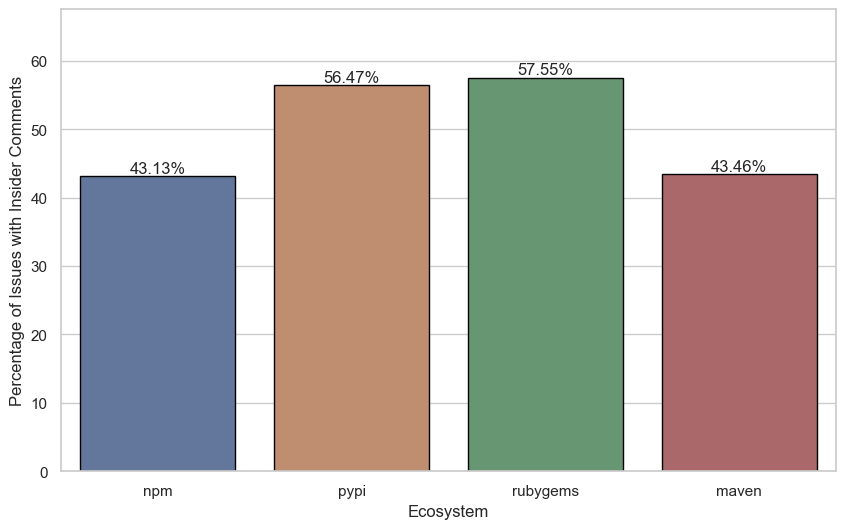

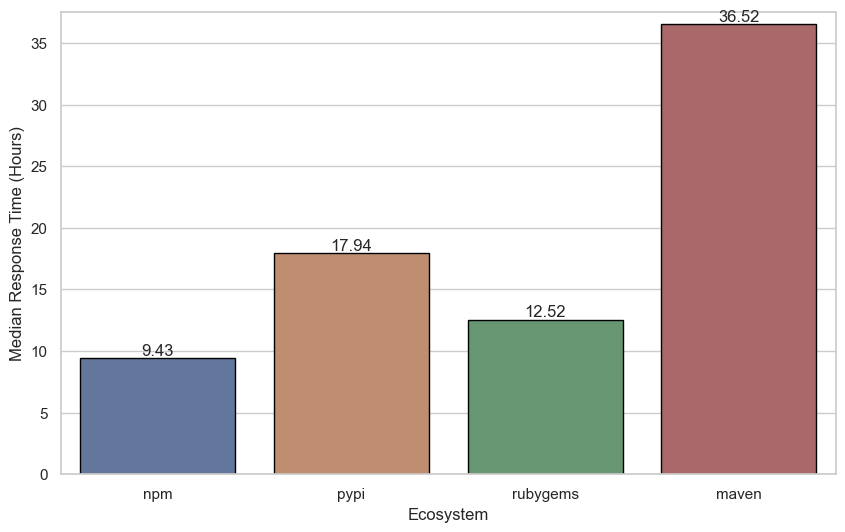

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV data into a DataFrame
df = pd.read_csv('community_responsiveness_records_full.csv')
filtered_data = df[df['openByOutsider'] == True]

# Define custom order for 'ecosystem'
custom_order = ['npm', 'pypi', 'rubygems', 'maven']

# Define custom colors for each ecosystem
custom_colors = ['#5975a4', '#cc8963', '#5f9e6e', '#b55d60']

# PART 1
filtered_data = df[df['openByOutsider'] == True]
grouped_data = filtered_data.groupby('ecosystem')
print(grouped_data['returnByInsider'].sum())
print(grouped_data['returnByInsider'].count())
percentage_insider_comments_by_ecosystem = (grouped_data['returnByInsider'].sum() / grouped_data['returnByInsider'].count()) * 100

# Create a custom color palette for Part 1
sns.set(style="whitegrid")
sns.set_palette(custom_colors)

# Create a barplot for Part 1 with custom colors and black border
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=custom_order, y=percentage_insider_comments_by_ecosystem[custom_order].values, palette=custom_colors, edgecolor='black')
# plt.title('Percentage of Issues in Each Ecosystem with Outsider-Opened Issues and Insider Comments')
plt.xlabel('Ecosystem')
plt.ylabel('Percentage of Issues with Insider Comments')

# Annotate the bars with percentage values
for index, value in enumerate(percentage_insider_comments_by_ecosystem[custom_order]):
    ax1.text(index, value, f"{value:.2f}%", ha='center', va='bottom')

plt.ylim(0, max(percentage_insider_comments_by_ecosystem) + 10)  # Adjust y-axis limits
plt.show()

# PART 2
def calculate_average_time_to_response(group):
    group['created_at'] = pd.to_datetime(group['created_at'])
    group['reply_at'] = pd.to_datetime(group['reply_at'])
    return (group['reply_at'] - group['created_at']).median()

average_time_to_response_by_ecosystem = grouped_data.apply(calculate_average_time_to_response)
average_time_to_response_by_ecosystem_hours = average_time_to_response_by_ecosystem / pd.Timedelta(hours=1)

# Create a custom color palette for Part 2
sns.set_palette(custom_colors)

# Create a barplot for Part 2 with custom colors and black border
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=custom_order, y=average_time_to_response_by_ecosystem_hours[custom_order].values, palette=custom_colors, edgecolor='black')
# plt.title('Median Insider Response Time to Outsider-Opened Issues Across Repositories')
plt.xlabel('Ecosystem')
plt.ylabel('Median Response Time (Hours)')

# Annotate the bars with median response time values
for index, value in enumerate(average_time_to_response_by_ecosystem_hours[custom_order]):
    ax2.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.ylim(0, max(average_time_to_response_by_ecosystem_hours) + 1)  # Adjust y-axis limits
plt.show()
